In [2]:
#Import Dependencies
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
#import Files
file ='resources/all_data_final.csv'
alldata = pd.read_csv(file)

In [4]:
linear1={}
multilinear2={}
multilinear3={}
multilinear4={}

# Regression on All Factors

In [5]:
#Perform Linear Regression on every variable
results ={}
for value in alldata.columns[4:]:
    #Choose columns
    fewdata = alldata[["Country","Year","Life Expectancy",value]].copy()
    X = fewdata[value].values.reshape(-1, 1)
    y = fewdata["Life Expectancy"].values.reshape(-1, 1)
    
    #Split Data into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    model = LinearRegression()

    model.fit(X_train, y_train)
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    
    results[value] = {"Training Score":training_score,"Testing Score": testing_score, "Coefficent": model.coef_[0][0], "y intercept": model.intercept_[0]} 
scores = pd.DataFrame(results)
linearall = scores.transpose().sort_values(by=['Testing Score'], ascending=False)
linear1["linearall"]=linearall
linearall.head()

,Training Score,Testing Score,Coefficent,y intercept
Income Composition Of Resources,0.627055,0.720901,43.792014,41.104853
Birth Per Woman,0.628805,0.605322,-4.810262,83.524962
Water,0.645338,0.580237,0.397209,36.373732
Adult Mortality,0.531690,0.543322,-0.052038,78.456977
Schooling,0.562011,0.501666,2.386010,40.340170


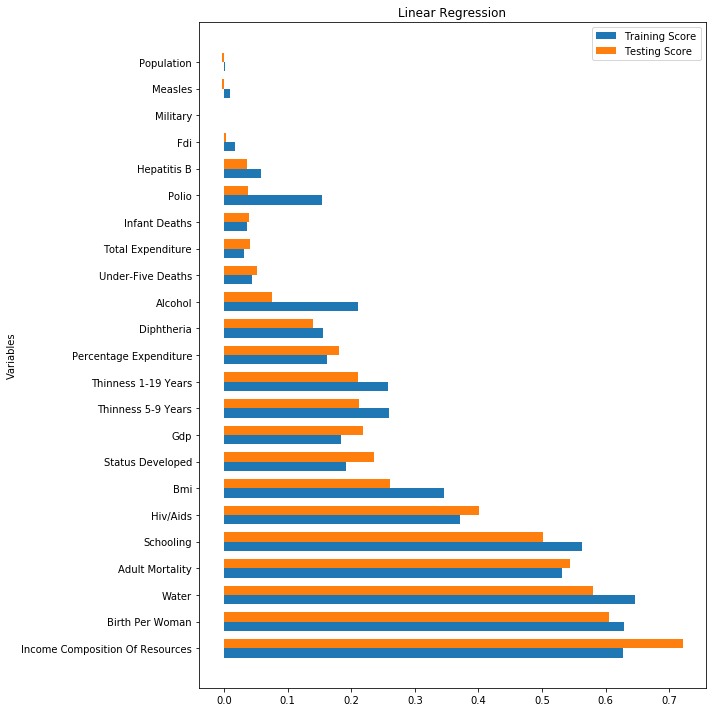

In [6]:
#Graphing Single Regression Results
lab = linearall.index
y = np.arange(len(lab))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.barh(y - width/2, linearall["Training Score"],width, label="Training Score")
rects2 = ax.barh(y + width/2, linearall["Testing Score"],width, label="Testing Score")
ax.set_ylabel('Variables')
ax.set_title('Linear Regression')
ax.set_yticks(y)
ax.set_yticklabels(lab)
ax.legend()
plt.tight_layout()
plt.savefig('images/linearall.png')

In [7]:
#multilinear regression with 2 variables
others =alldata.columns[4:]
resultstoo = {}
for o1 in range(len(others)-1):
    value=others[o1]
    otherstoo = others[1:]
    for other in otherstoo:
        fewdata = alldata[["Country","Year","Life Expectancy",value, other]].copy()
        if value != other:
            theX = [value, other]
            theX.sort()
            X = fewdata[theX]
            y = fewdata["Life Expectancy"].values.reshape(-1, 1)
            #Split Data into Train and Test
            X_train, X_test, y_train, y_test = train_test_split(X, y)

            model = LinearRegression()

            model.fit(X_train, y_train)
            training_score = model.score(X_train, y_train)
            testing_score = model.score(X_test, y_test)

            resultstoo[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1], "y intercept": model.intercept_[0]} 
scorestoo = pd.DataFrame(resultstoo)
scorestoo=scorestoo.transpose().sort_values(by=['Testing Score'], ascending=False)
multilinear2["all"]=scorestoo
multilinear2["all"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,y intercept
Hiv/Aids & Income Composition Of Resources,0.768135,0.795753,Income Composition Of Resources,-0.629431,Hiv/Aids,36.6141,47.0707
Birth Per Woman & Hiv/Aids,0.751578,0.78975,Birth Per Woman,-3.96111,Hiv/Aids,-0.671756,82.3387
Adult Mortality & Schooling,0.737585,0.78893,Adult Mortality,-0.0354918,Schooling,1.6339,55.5293
Adult Mortality & Water,0.763671,0.773986,Adult Mortality,-0.030325,Water,0.280672,51.2677
Income Composition Of Resources & Total Expenditure,0.613115,0.760339,Income Composition Of Resources,41.8886,Total Expenditure,0.223299,41.1065


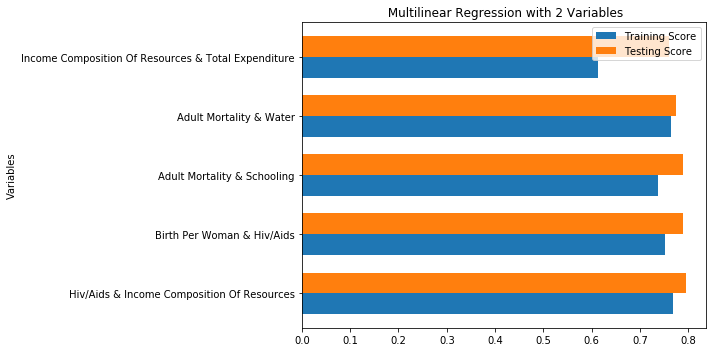

In [8]:
#Graphing 2Variable Regression Results

top5 = multilinear2["all"][:5]
lab = top5.index
y = np.arange(len(lab))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
ax.set_ylabel('Variables')
ax.set_title(f' Multilinear Regression with 2 Variables')
ax.set_yticks(y)
ax.set_yticklabels(lab)
ax.legend()
plt.tight_layout()
plt.savefig(f'images/all2.png')

In [9]:
#multilinear regression with 3 variables
others = alldata.columns[4:]
resultsthree ={}
for o1 in range(len(others)-2):
        value=others[o1]
        otherstoo = others[1:]
        for o2 in range(len(otherstoo)-1):
            other=otherstoo[o2+1]
            othersthree = otherstoo[1:]
            for other2 in othersthree:
                fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2]].copy()
                if (value != other) and (value != other2) and (other2 != other):
                    theX = [value, other, other2]
                    theX.sort()
                    X = fewdata[theX]
                    y = fewdata["Life Expectancy"].values.reshape(-1, 1)
                    #Split Data into Train and Test
                    X_train, X_test, y_train, y_test = train_test_split(X, y)

                    model = LinearRegression()
                    model.fit(X_train, y_train)
                    training_score = model.score(X_train, y_train)
                    testing_score = model.score(X_test, y_test)
                
                    resultsthree[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2], "y intercept": model.intercept_[0]} 
scoresthree = pd.DataFrame(resultsthree)
scoresthree= scoresthree.transpose().sort_values(by=['Testing Score'], ascending=False)
multilinear3["all"]=scoresthree
multilinear3["all"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,y intercept
Hiv/Aids & Income Composition Of Resources & Population,0.743963,0.855681,Income Composition Of Resources,-0.666412,Population,35.4827,Hiv/Aids,-2.22457e-09,47.9901
Hiv/Aids & Income Composition Of Resources & Military,0.755085,0.839342,Income Composition Of Resources,-0.668391,Military,36.3789,Hiv/Aids,0.392052,46.5041
Adult Mortality & Income Composition Of Resources & Under-Five Deaths,0.775116,0.838397,Adult Mortality,-0.0302539,Income Composition Of Resources,31.8143,Under-Five Deaths,-0.00271864,54.1729
Adult Mortality & Birth Per Woman & Hiv/Aids,0.792353,0.833527,Adult Mortality,-0.0203145,Birth Per Woman,-3.40409,Hiv/Aids,-0.423424,83.7492
Adult Mortality & Income Composition Of Resources & Percentage Expenditure,0.778264,0.828732,Adult Mortality,-0.0316746,Income Composition Of Resources,29.3336,Percentage Expenditure,0.000324845,55.7374


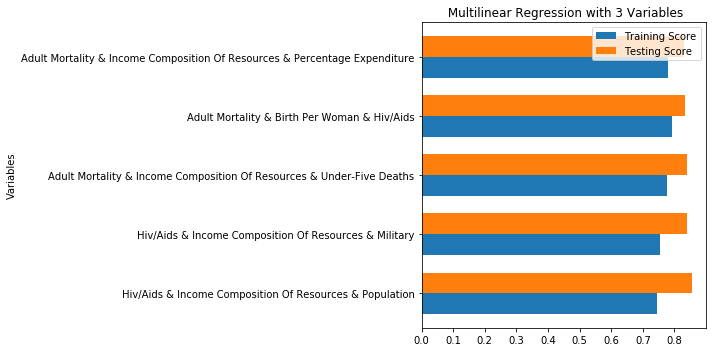

In [10]:
#Graphing 3Variable Regression Results

top5 = multilinear3["all"][:5]
lab = top5.index
y = np.arange(len(lab))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
ax.set_ylabel('Variables')
ax.set_title(f' Multilinear Regression with 3 Variables')
ax.set_yticks(y)
ax.set_yticklabels(lab)
ax.legend()
plt.tight_layout()
plt.savefig(f'images/all3.png')

In [11]:
#multilinear regression with 4 variables
others = alldata.columns[4:]
resultsfour ={}
for o1 in range(len(others)-3):
    value=others[o1]
    otherstoo = others[1:]
    for o2 in range(len(otherstoo)-2):
        other=otherstoo[o2+1]
        othersthree = otherstoo[1:]
        for o3 in range(len(othersthree)-1):
            other=otherstoo[o3+2]
            othersfour = othersthree[1:]
            for other3 in othersfour:
                fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2,other3]].copy()
                if (value != other) and (value != other2) and (other2 != other) and (value != other3) and (other3 != other2) and (other3 != other):
                    theX = [value, other, other2,other3]
                    theX.sort()
                    X = fewdata[theX]
                    y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                    #Split Data into Train and Test
                    X_train, X_test, y_train, y_test = train_test_split(X, y)

                    model = LinearRegression()

                    model.fit(X_train, y_train)
                    training_score = model.score(X_train, y_train)
                    testing_score = model.score(X_test, y_test)

                    resultsfour[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score, "Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2],"Other Variable3":other3,f"Coefficent4": model.coef_[0][3], "y intercept": model.intercept_[0]} 
scoresfour = pd.DataFrame(resultsfour)
scoresfour = scoresfour.transpose().sort_values(by=['Testing Score'], ascending=False)
multilinear4["all"]=scoresfour
multilinear4["all"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,Other Variable3,Coefficent4,y intercept
Gdp & Hiv/Aids & Income Composition Of Resources & Status Developed,0.764087,0.838819,Income Composition Of Resources,8.18697e-05,Gdp,-0.649575,Status Developed,32.3828,Hiv/Aids,0.748352,49.2292
Hiv/Aids & Status Developed & Thinness 1-19 Years & Water,0.800753,0.830989,Thinness 1-19 Years,-0.61888,Water,3.16385,Status Developed,-0.358944,Hiv/Aids,0.268837,49.5306
Adult Mortality & Income Composition Of Resources & Status Developed & Thinness 5-9 Years,0.7872,0.827859,Adult Mortality,-0.029362,Income Composition Of Resources,29.0608,Status Developed,0.531557,Thinness 5-9 Years,-0.207606,56.4719
Hiv/Aids & Status Developed & Thinness 5-9 Years & Water,0.804959,0.826247,Thinness 5-9 Years,-0.609453,Water,3.21093,Status Developed,-0.37714,Hiv/Aids,0.27164,49.4999
Birth Per Woman & Hiv/Aids & Status Developed & Thinness 5-9 Years,0.790073,0.825182,Birth Per Woman,-3.38272,Thinness 5-9 Years,-0.642843,Status Developed,2.34864,Hiv/Aids,-0.338846,81.8621


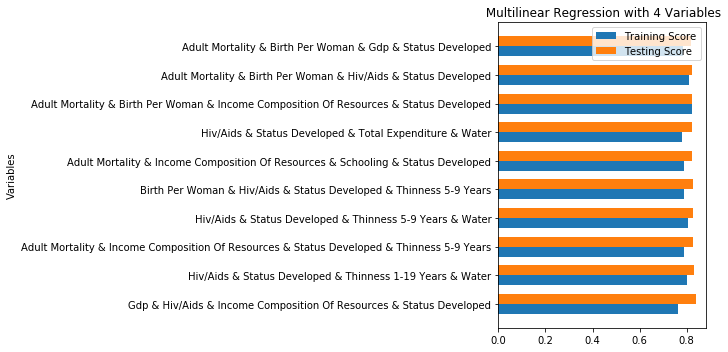

In [12]:
#Graphing 4Variable Regression Results

top5 = multilinear4["all"][:10]
lab = top5.index
y = np.arange(len(lab))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
ax.set_ylabel('Variables')
ax.set_title(f' Multilinear Regression with 4 Variables')
ax.set_yticks(y)
ax.set_yticklabels(lab)
ax.legend()
plt.tight_layout()
plt.savefig(f'images/all4.png')

# Health Vs NonHealth Variables

In [13]:
#Use if want to filter for type of variable
#cols[0] for health variables 
#cols[1] for non-health variables
cols = []
labels = ["health","nonhealth"]
cols.append(['Country', 'Year', 'Life Expectancy', 'Adult Mortality', 'Infant Deaths','Hepatitis B','Measles', 'Bmi', 'Under-Five Deaths', 'Polio','Diphtheria', 'Hiv/Aids', 'Thinness 1-19 Years','Thinness 5-9 Years'])
cols.append(['Country', 'Year', 'Life Expectancy', 'Alcohol', 'Percentage Expenditure', 'Total Expenditure','Gdp', 'Population','Income Composition Of Resources', 'Schooling','Fdi', 'Birth Per Woman', 'Water', 'Military', 'Status Developed'])
print(cols[1])

['Country', 'Year', 'Life Expectancy', 'Alcohol', 'Percentage Expenditure', 'Total Expenditure', 'Gdp', 'Population', 'Income Composition Of Resources', 'Schooling', 'Fdi', 'Birth Per Woman', 'Water', 'Military', 'Status Developed']


In [14]:
#linear regression with variables
for col in range(len(cols)):
    results ={}
    others = cols[col][3:]
    for value in others:
        fewdata = alldata[["Country","Year","Life Expectancy",value]].copy()
        X = fewdata[[value]]
        y = fewdata["Life Expectancy"].values.reshape(-1, 1)

        #Split Data into Train and Test
        X_train, X_test, y_train, y_test = train_test_split(X, y)

        model = LinearRegression()

        model.fit(X_train, y_train)
        training_score = model.score(X_train, y_train)
        testing_score = model.score(X_test, y_test)

        results[value] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0], "y intercept": model.intercept_[0]} 
        scores = pd.DataFrame(results)
        scores=scores.transpose().sort_values(by=['Testing Score'], ascending=False)
        linear1[labels[col]]=scores
linear1["health"].head()

,Training Score,Testing Score,Variable,Coefficent,y intercept
Adult Mortality,0.51773,0.578545,Adult Mortality,-0.0503527,78.0899
Hiv/Aids,0.389348,0.346125,Hiv/Aids,-1.06125,71.8929
Thinness 5-9 Years,0.236593,0.289213,Thinness 5-9 Years,-0.960281,74.3845
Bmi,0.345313,0.269333,Bmi,0.275192,59.3639
Thinness 1-19 Years,0.241199,0.265552,Thinness 1-19 Years,-0.985866,74.5413


In [15]:
linear1["nonhealth"].head()

,Training Score,Testing Score,Variable,Coefficent,y intercept
Income Composition Of Resources,0.653888,0.636615,Income Composition Of Resources,45.2425,40.2028
Birth Per Woman,0.621257,0.626393,Birth Per Woman,-4.77615,83.4184
Water,0.641158,0.597416,Water,0.396237,36.4071
Schooling,0.544183,0.556938,Schooling,2.36323,40.5078
Percentage Expenditure,0.153803,0.21885,Percentage Expenditure,0.00187305,68.3584


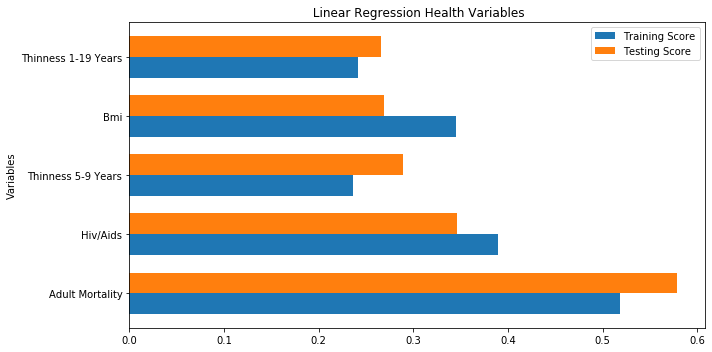

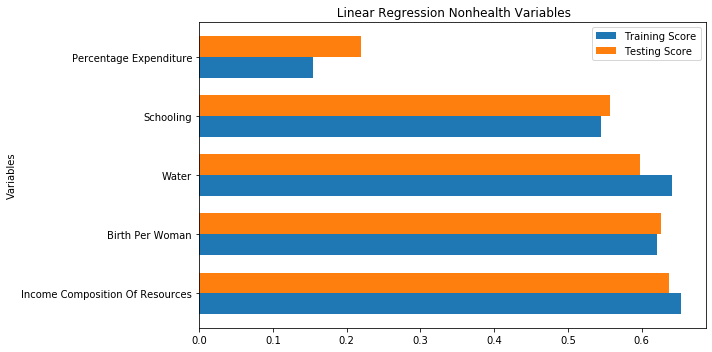

In [16]:
#Graphing 1Variable Regression Results
for label in labels:
    top5 = linear1[label][:5]
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Linear Regression {label.title()} Variables')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}1.png')

In [17]:
#multilinear regression with 2 variables
for col in range(len(cols)):
    resultstoo ={}
    others = cols[col][3:]
    for o1 in range(len(others)-1):
        value=others[o1]
        otherstoo = others[1:]
        for other in otherstoo:
            fewdata = alldata[["Country","Year","Life Expectancy",value, other]].copy()
            if value != other:
                theX = [value, other]
                theX.sort()
                X = fewdata[theX]
                y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                #Split Data into Train and Test
                X_train, X_test, y_train, y_test = train_test_split(X, y)

                model = LinearRegression()

                model.fit(X_train, y_train)
                training_score = model.score(X_train, y_train)
                testing_score = model.score(X_test, y_test)

                resultstoo[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1], "y intercept": model.intercept_[0]} 
    scorestoo = pd.DataFrame(resultstoo)
    scorestoo=scorestoo.transpose().sort_values(by=['Testing Score'], ascending=False)
    multilinear2[labels[col]]=scorestoo
multilinear2["health"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,y intercept
Adult Mortality & Thinness 1-19 Years,0.600258,0.673564,Adult Mortality,-0.0448991,Thinness 1-19 Years,-0.602464,80.1505
Adult Mortality & Thinness 5-9 Years,0.61012,0.630978,Adult Mortality,-0.0449441,Thinness 5-9 Years,-0.564508,79.9155
Adult Mortality & Measles,0.518015,0.615554,Adult Mortality,-0.0517086,Measles,-6.65496e-05,78.5088
Adult Mortality & Hiv/Aids,0.560071,0.599828,Adult Mortality,-0.0391331,Hiv/Aids,-0.477528,77.0188
Adult Mortality & Hepatitis B,0.534825,0.595085,Adult Mortality,-0.0506628,Hepatitis B,0.0456754,74.7328


In [18]:
multilinear2["nonhealth"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,y intercept
Income Composition Of Resources & Water,0.695375,0.755358,Water,24.5924,Income Composition Of Resources,0.210025,36.0198
Income Composition Of Resources & Military,0.633605,0.701912,Military,43.6455,Income Composition Of Resources,0.462267,40.4662
Gdp & Income Composition Of Resources,0.637742,0.701271,Income Composition Of Resources,7.33281e-05,Gdp,41.1821,42.4571
Fdi & Income Composition Of Resources,0.63337,0.689202,Fdi,0.0118655,Income Composition Of Resources,43.0489,41.564
Income Composition Of Resources & Schooling,0.65567,0.679591,Schooling,37.05,Income Composition Of Resources,0.575746,38.3575


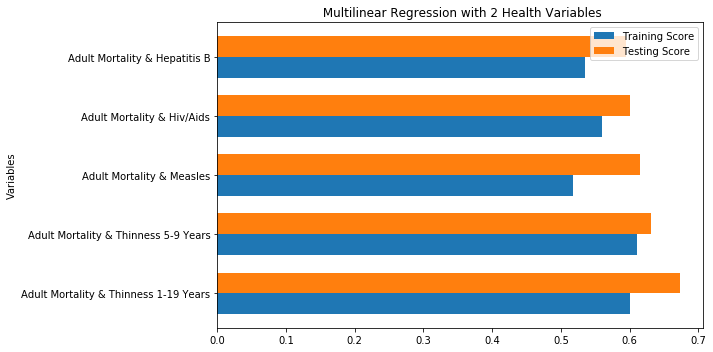

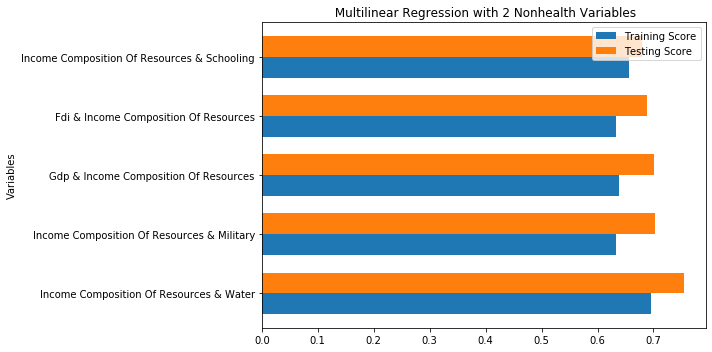

In [19]:
#Graphing 2Variable Regression Results
for label in labels:
    top5 = multilinear2[label][:5]
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Multilinear Regression with 2 {label.title()} Variables')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}2.png')

In [20]:
#multilinear regression with 3 variables
for col in range(len(cols)):
    others = cols[col][3:]
    resultsthree ={}
    for o1 in range(len(others)-2):
            value=others[o1]
            otherstoo = others[1:]
            for o2 in range(len(otherstoo)-1):
                other=otherstoo[o2+1]
                othersthree = otherstoo[1:]
                for other2 in othersthree:
                    fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2]].copy()
                    if (value != other) and (value != other2) and (other2 != other):
                        theX = [value, other, other2]
                        theX.sort()
                        X = fewdata[theX]
                        y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                        #Split Data into Train and Test
                        X_train, X_test, y_train, y_test = train_test_split(X, y)

                        model = LinearRegression()
                        model.fit(X_train, y_train)
                        training_score = model.score(X_train, y_train)
                        testing_score = model.score(X_test, y_test)

                        resultsthree[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2], "y intercept": model.intercept_[0]} 
    scoresthree = pd.DataFrame(resultsthree)
    scoresthree= scoresthree.transpose().sort_values(by=['Testing Score'], ascending=False)
    multilinear3[labels[col]]=scoresthree
multilinear3["health"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,y intercept
Adult Mortality & Bmi & Thinness 1-19 Years,0.646477,0.721787,Adult Mortality,-0.0394947,Thinness 1-19 Years,0.128328,Bmi,-0.349847,73.0748
Adult Mortality & Bmi & Hepatitis B,0.627861,0.70154,Adult Mortality,-0.0420505,Bmi,0.15432,Hepatitis B,0.0284498,68.6325
Adult Mortality & Diphtheria & Thinness 1-19 Years,0.632423,0.690046,Adult Mortality,-0.0427769,Thinness 1-19 Years,0.0775885,Diphtheria,-0.531975,72.781
Adult Mortality & Bmi & Thinness 5-9 Years,0.658039,0.679415,Adult Mortality,-0.0398555,Thinness 5-9 Years,0.12009,Bmi,-0.383603,73.6304
Bmi & Diphtheria & Hiv/Aids,0.585124,0.678138,Hiv/Aids,0.18661,Diphtheria,0.0843795,Bmi,-0.849775,57.0241


In [21]:
multilinear3["nonhealth"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,y intercept
Birth Per Woman & Income Composition Of Resources & Total Expenditure,0.702079,0.781548,Birth Per Woman,-2.75047,Income Composition Of Resources,24.6999,Total Expenditure,0.205459,60.2651
Alcohol & Birth Per Woman & Income Composition Of Resources,0.704791,0.780173,Alcohol,-0.170213,Birth Per Woman,-2.61014,Income Composition Of Resources,28.3404,59.4688
Birth Per Woman & Gdp & Schooling,0.670438,0.743518,Birth Per Woman,-3.37039,Schooling,0.000114513,Gdp,0.783615,69.0381
Birth Per Woman & Income Composition Of Resources & Water,0.728644,0.735315,Water,-2.04381,Birth Per Woman,20.1554,Income Composition Of Resources,0.107453,53.4202
Birth Per Woman & Income Composition Of Resources & Percentage Expenditure,0.724394,0.734766,Percentage Expenditure,-2.5773,Birth Per Woman,25.498,Income Composition Of Resources,0.000414432,60.1191


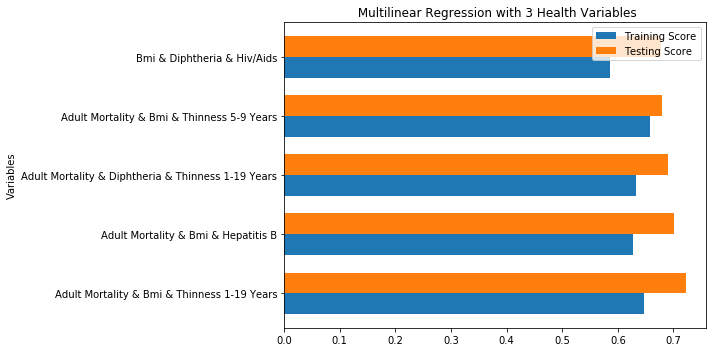

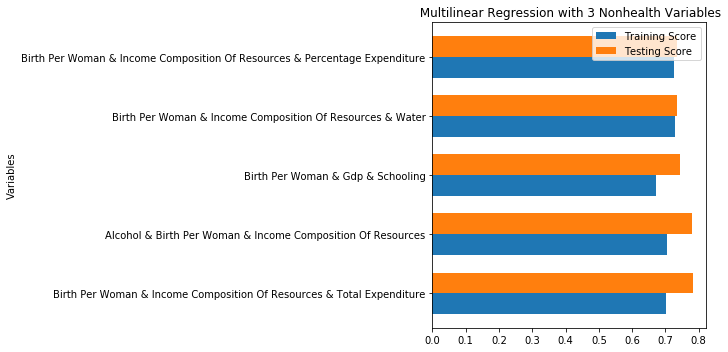

In [22]:
#Graphing 3Variable Regression Results
for label in labels:
    top5 = multilinear3[label][:5]
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Multilinear Regression with 3 {label.title()} Variables')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}3.png')

In [23]:
#multilinear regression with 4 variables
for col in range(len(cols)):
    others = cols[col][3:]
    resultsfour ={}
    for o1 in range(len(others)-3):
        value=others[o1]
        otherstoo = others[1:]
        for o2 in range(len(otherstoo)-2):
            other=otherstoo[o2+1]
            othersthree = otherstoo[1:]
            for o3 in range(len(othersthree)-1):
                other=otherstoo[o3+2]
                othersfour = othersthree[1:]
                for other3 in othersfour:
                    fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2,other3]].copy()
                    if (value != other) and (value != other2) and (other2 != other) and (value != other3) and (other3 != other2) and (other3 != other):
                        theX = [value, other,other2,other3]
                        theX.sort()
                        X = fewdata[theX]
                        y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                        #Split Data into Train and Test
                        X_train, X_test, y_train, y_test = train_test_split(X, y)

                        model = LinearRegression()

                        model.fit(X_train, y_train)
                        training_score = model.score(X_train, y_train)
                        testing_score = model.score(X_test, y_test)

                        resultsfour[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score, "Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2],"Other Variable3":other3,f"Coefficent4": model.coef_[0][3], "y intercept": model.intercept_[0]} 
    scoresfour = pd.DataFrame(resultsfour)
    scoresfour = scoresfour.transpose().sort_values(by=['Testing Score'], ascending=False)
    multilinear4[labels[col]]=scoresfour
multilinear4["health"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,Other Variable3,Coefficent4,y intercept
Adult Mortality & Measles & Status Developed & Thinness 1-19 Years,0.622965,0.735193,Adult Mortality,-0.0410211,Thinness 1-19 Years,-2.45117e-05,Status Developed,4.69805,Measles,-0.527935,78.285
Adult Mortality & Polio & Status Developed & Thinness 5-9 Years,0.643124,0.727527,Adult Mortality,-0.0393388,Thinness 5-9 Years,0.0545185,Status Developed,4.77386,Polio,-0.435635,72.9863
Adult Mortality & Bmi & Hiv/Aids & Status Developed,0.704998,0.72001,Adult Mortality,-0.0275781,Hiv/Aids,0.142485,Status Developed,-0.424709,Bmi,4.43251,68.9834
Adult Mortality & Diphtheria & Status Developed & Thinness 1-19 Years,0.656897,0.70811,Adult Mortality,-0.0394159,Thinness 1-19 Years,0.0645169,Status Developed,4.34046,Diphtheria,-0.458612,72.1563
Adult Mortality & Bmi & Polio & Status Developed,0.678585,0.70531,Adult Mortality,-0.0379078,Polio,0.137371,Status Developed,0.0572102,Bmi,4.08572,65.3545


In [24]:
multilinear4["nonhealth"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,Other Variable3,Coefficent4,y intercept
Alcohol & Income Composition Of Resources & Status Developed & Water,0.697836,0.807282,Alcohol,-0.259075,Water,24.2169,Status Developed,3.29422,Income Composition Of Resources,0.222851,35.8722
Income Composition Of Resources & Percentage Expenditure & Status Developed & Water,0.704764,0.768234,Percentage Expenditure,22.3377,Water,0.000436261,Status Developed,0.898048,Income Composition Of Resources,0.209472,36.9534
Birth Per Woman & Income Composition Of Resources & Status Developed & Water,0.730907,0.73718,Birth Per Woman,-1.39991,Water,24.0539,Status Developed,1.14642,Income Composition Of Resources,0.115004,48.138
Income Composition Of Resources & Military & Status Developed & Water,0.709475,0.736089,Income Composition Of Resources,21.6992,Military,0.110105,Status Developed,2.10529,Water,0.2203,36.5184
Birth Per Woman & Income Composition Of Resources & Status Developed & Total Expenditure,0.715401,0.733565,Total Expenditure,-2.73107,Birth Per Woman,22.5165,Status Developed,0.875112,Income Composition Of Resources,0.187075,61.6661


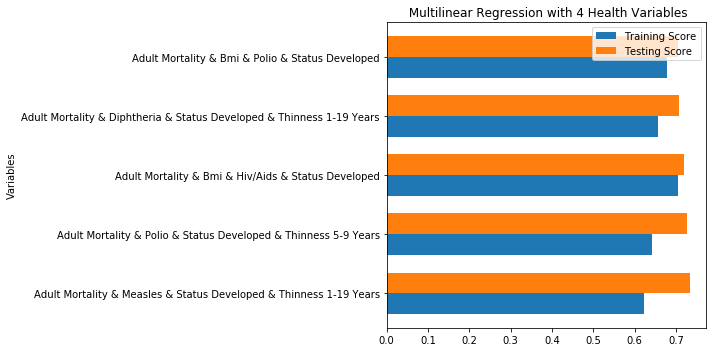

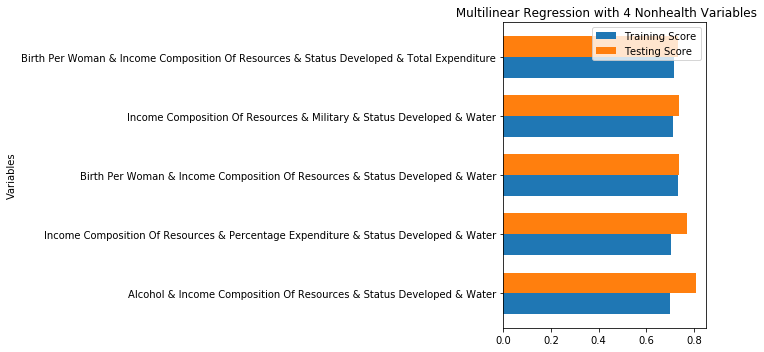

In [25]:
#Graphing 4Variable Regression Results
for label in labels:
    top5 = multilinear4[label][:5]
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Multilinear Regression with 4 {label.title()} Variables')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}4.png')

# Developed Vs Developing Countries

In [26]:
#Create a Developing Dataset and Developed Dataset
developed = alldata.copy().rename(columns={"Status Developed":"Developed"})
developed = developed[developed.columns[1:]]
developing = alldata.copy()
developing["Status Developed"] = developing["Status Developed"].replace(0, 2).replace(1, 0).replace(2, 1)
developing = developing.rename(columns={"Status Developed":"Developing"})
developing = developing[developing.columns[1:]]
datasets = [developed, developing]
labels = ["Developed", "Developing"]

#Split Dataset into Developing and Developed Countries
developed = developed.drop(x for x in developed["Developed"].index if developed.loc[x]["Developed"] == 0)
developed = developed[developed.columns[:-1]]
developing = developing.drop(x for x in developing["Developing"].index if developing.loc[x]["Developing"] == 0)
developing = developing[developing.columns[:-1]]
developing.head()

,Country,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,Bmi,...,Gdp,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling,Fdi,Birth Per Woman,Water,Military
0,afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,584.259210,33736494.0,17.2,17.3,0.479,10.1,0.849679,4.80,61.5,0.993455
1,afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,612.696514,327582.0,17.5,17.5,0.476,10.0,0.209790,4.98,58.8,1.298013
2,afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,631.744976,31731688.0,17.7,17.7,0.470,9.9,0.234965,5.17,56.2,1.076950
3,afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,0.284095,5.38,53.5,1.175417
4,afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,63.537231,2978599.0,18.2,18.2,0.454,9.5,0.293039,5.60,50.9,1.821346


In [27]:
#Creating Labels and columns list
datasets = [developed, developing]
labels = ["developed", "developing"]

In [28]:
#Linear regression 
regress1=[]
for index in range(len(datasets)):
    label = labels[index]
    results ={}
    for value in alldata.columns[3:]:
        #Choose columns
        fewdata = alldata[["Country","Year","Life Expectancy",value]].copy()
        X = fewdata[value].values.reshape(-1, 1)
        y = fewdata["Life Expectancy"].values.reshape(-1, 1)

        #Split Data into Train and Test
        X_train, X_test, y_train, y_test = train_test_split(X, y)

        model = LinearRegression()

        model.fit(X_train, y_train)
        training_score = model.score(X_train, y_train)
        testing_score = model.score(X_test, y_test)

        results[value] = {"Training Score":training_score,"Testing Score": testing_score, "Coefficent": model.coef_[0][0], "y intercept": model.intercept_[0]} 
    scores = pd.DataFrame(results)
    scores = scores.transpose().sort_values(by=['Testing Score'], ascending=False)
    regress1.append(scores)
    linear1[labels[index]] = scores
linear1["developing"]

,Training Score,Testing Score,Coefficent,y intercept
Life Expectancy,1.000000,1.000000,1.000000e+00,-5.684342e-14
Income Composition Of Resources,0.627103,0.703712,4.326065e+01,4.148129e+01
Water,0.633900,0.614472,3.986813e-01,3.613930e+01
Birth Per Woman,0.635573,0.582384,-4.906956e+00,8.396722e+01
Schooling,0.547061,0.544614,2.397085e+00,4.005785e+01
Adult Mortality,0.538458,0.497719,-5.090560e-02,7.808989e+01
Hiv/Aids,0.359941,0.428825,-1.015111e+00,7.155129e+01
Bmi,0.320532,0.348510,2.581263e-01,6.006781e+01
Status Developed,0.192563,0.227668,1.067616e+01,6.810845e+01
Thinness 5-9 Years,0.257597,0.223400,-1.036558e+00,7.487114e+01


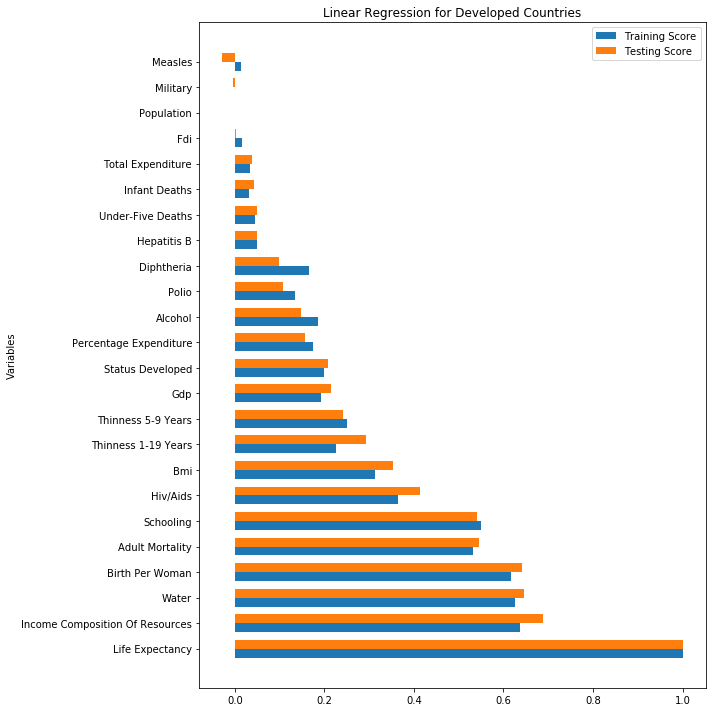

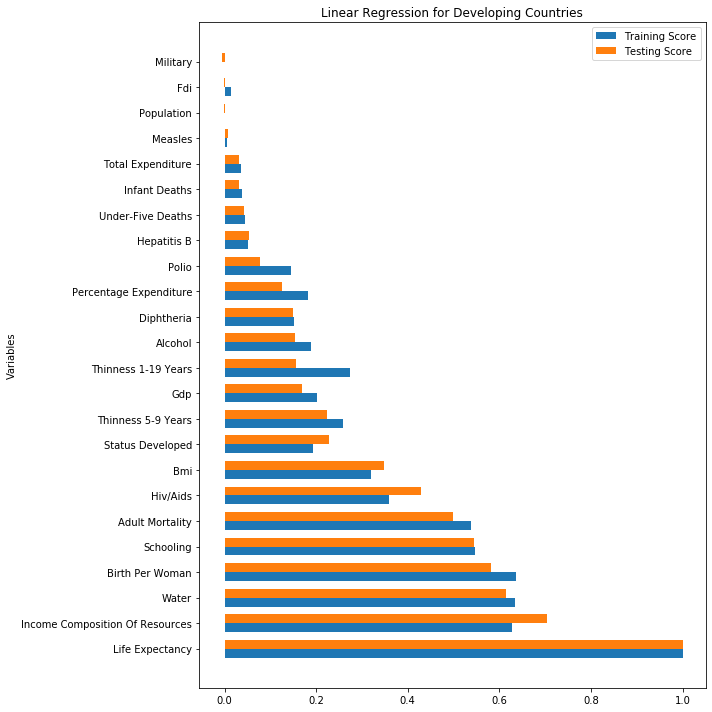

In [29]:
#Graphing Single Regression Results
for label in labels:
    lab = linear1[label].index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 10))
    rects1 = ax.barh(y - width/2, linear1[label]["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, linear1[label]["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f'Linear Regression for {label.title()} Countries')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/linear1{label}.png')

In [30]:
#multilinear regression with 2 variables
for index in range(len(datasets)):
    label = labels[index]
    resultstoo ={}
    others = list(datasets[index].columns[3:])
    for o1 in range(len(others)-1):
        value=others[o1]
        otherstoo = others[1:]
        for other in otherstoo:
            fewdata = alldata[["Country","Year","Life Expectancy",value, other]].copy()
            if (value != other):
                theX = [value, other]
                theX.sort()
                X = fewdata[theX]
                y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                #Split Data into Train and Test
                X_train, X_test, y_train, y_test = train_test_split(X, y)

                model = LinearRegression()

                model.fit(X_train, y_train)
                training_score = model.score(X_train, y_train)
                testing_score = model.score(X_test, y_test)

                resultstoo[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1], "y intercept": model.intercept_[0]} 
    scorestoo = pd.DataFrame(resultstoo)
    scorestoo = scorestoo.transpose().sort_values(by=['Testing Score'], ascending=False)
    multilinear2[labels[index]] = scorestoo
multilinear2["developing"]

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,y intercept
Adult Mortality & Schooling,0.740875,0.779642,Adult Mortality,-0.0346849,Schooling,1.70438,54.5101
Adult Mortality & Birth Per Woman,0.765941,0.777699,Adult Mortality,-0.0324128,Birth Per Woman,-3.47629,85.2742
Hiv/Aids & Income Composition Of Resources,0.77428,0.775832,Income Composition Of Resources,-0.670238,Hiv/Aids,36.0964,47.3269
Adult Mortality & Income Composition Of Resources,0.793746,0.770487,Adult Mortality,-0.0291086,Income Composition Of Resources,34.251,52.1585
Hiv/Aids & Water,0.75964,0.761047,Water,-0.655012,Hiv/Aids,0.32614,43.6917
...,...,...,...,...,...,...,...
Fdi & Population,0.0146889,0.00970363,Fdi,0.0403995,Population,-3.79913e-09,69.5044
Fdi & Measles,0.0239087,0.00492702,Fdi,0.0391101,Measles,-8.44687e-05,69.9866
Fdi & Military,0.0138569,0.00372284,Fdi,0.038096,Military,-0.0436909,69.909
Military & Population,0.00196105,-0.00256902,Population,-0.172874,Military,-3.49642e-09,70.1457


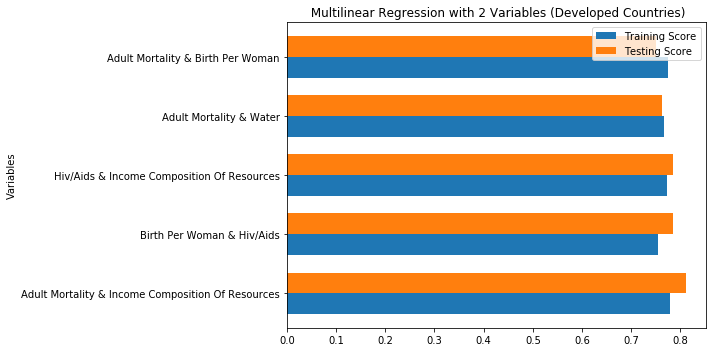

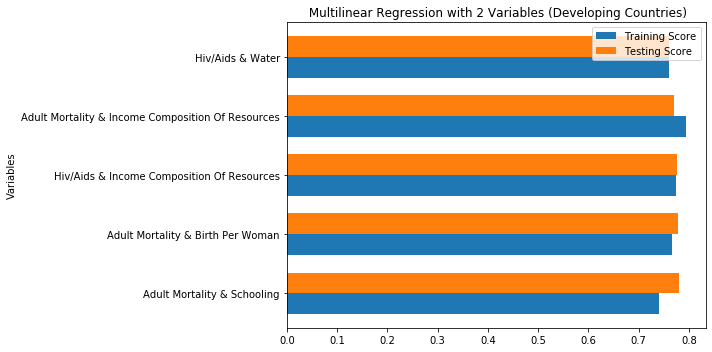

In [31]:
#Graphing 4Variable Regression Results
for label in labels:
    top5 = multilinear2[label][:5]
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Multilinear Regression with 2 Variables ({label.title()} Countries)')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}2.png')

In [32]:
#multilinear regression with 3 variables
for index in range(len(datasets)):
    label = labels[index]
    resultsthree ={}
    others = list(datasets[index].columns[3:])
    for o1 in range(len(others)-2):
        value=others[o1]
        otherstoo = others[1:]
        for o2 in range(len(otherstoo)-1):
            other=otherstoo[o2+1]
            othersthree = otherstoo[1:]
            for other2 in othersthree:
                fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2]].copy()
                if (value != other) and (value != other2) and (other2 != other):
                    theX = [value, other,other2]
                    theX.sort()
                    X = fewdata[theX]
                    y = fewdata["Life Expectancy"].values.reshape(-1,1)

                    #Split Data into Train and Test
                    X_train, X_test, y_train, y_test = train_test_split(X, y)

                    model = LinearRegression()

                    model.fit(X_train, y_train)
                    training_score = model.score(X_train, y_train)
                    testing_score = model.score(X_test, y_test)

                    resultsthree[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2], "y intercept": model.intercept_[0]} 
    scoresthree = pd.DataFrame(resultsthree)
    scoresthree=scoresthree.transpose().sort_values(by=['Testing Score'], ascending=False)
    multilinear3[labels[index]]=scoresthree
multilinear3["developing"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,y intercept
Adult Mortality & Income Composition Of Resources & Water,0.805575,0.844038,Adult Mortality,-0.0264019,Water,19.5485,Income Composition Of Resources,0.160903,47.8782
Birth Per Woman & Hiv/Aids & Schooling,0.806551,0.839482,Birth Per Woman,-2.45902,Schooling,-0.681691,Hiv/Aids,1.087,64.6631
Adult Mortality & Alcohol & Income Composition Of Resources,0.771806,0.835765,Adult Mortality,-0.0319095,Income Composition Of Resources,0.0354414,Alcohol,30.4824,54.9702
Hiv/Aids & Income Composition Of Resources & Military,0.759783,0.831976,Income Composition Of Resources,-0.644971,Military,36.6066,Hiv/Aids,0.309426,46.5563
Hiv/Aids & Schooling & Water,0.809475,0.830504,Schooling,-0.671576,Water,1.12174,Hiv/Aids,0.189719,41.2638


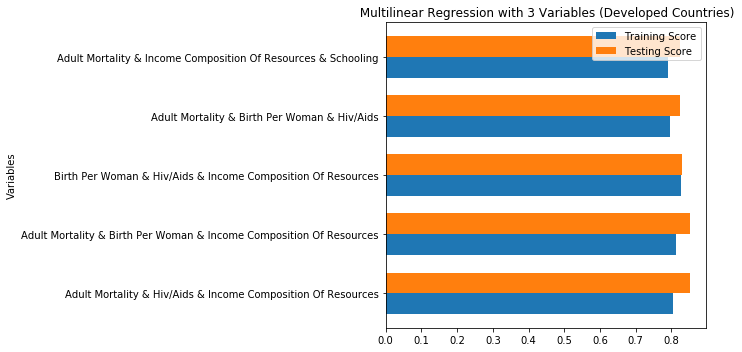

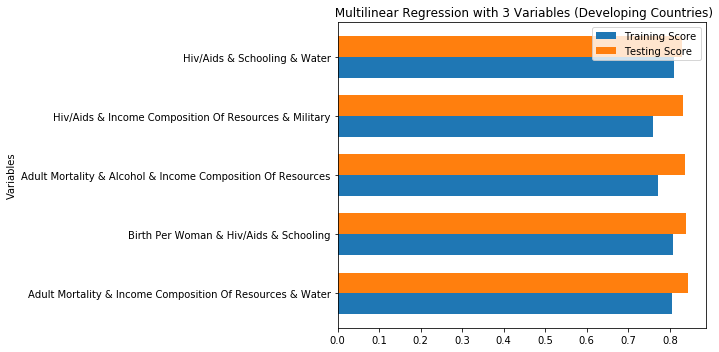

In [33]:
#Graphing 3Variable Regression Results
for label in labels:
    top5 = multilinear3[label][:5]
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Multilinear Regression with 3 Variables ({label.title()} Countries)')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}3.png')

In [34]:
#multilinear regression with 4 variables
for index in range(len(datasets)):
    label = labels[index]
    resultsfour ={}
    others = list(datasets[index].columns[3:])
    for o1 in range(len(others)-3):
        value=others[o1]
        otherstoo = others[1:]
        for o2 in range(len(otherstoo)-2):
            other=otherstoo[o2+1]
            othersthree = otherstoo[1:]
            for o3 in range(len(othersthree)-1):
                other=otherstoo[o3+2]
                othersfour = othersthree[1:]
                for other3 in othersfour:
                    fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2,other3]].copy().dropna(how="any")
                    if (value != other) and (value != other2) and (other2 != other) and (value != other3) and (other3 != other2) and (other3 != other):
                        theX = [value, other,other2,other3]
                        theX.sort()
                        X = fewdata[theX]
                        y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                        #Split Data into Train and Test
                        X_train, X_test, y_train, y_test = train_test_split(X, y)

                        model = LinearRegression()

                        model.fit(X_train, y_train)
                        training_score = model.score(X_train, y_train)
                        testing_score = model.score(X_test, y_test)

                        resultsfour[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score, "Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2],"Other Variable3":other3,f"Coefficent4": model.coef_[0][3], "y intercept": model.intercept_[0]} 
    scoresfour = pd.DataFrame(resultsfour)
    scoresfour =scoresfour.transpose().sort_values(by=['Testing Score'], ascending=False)
    multilinear4[labels[index]] = scoresfour
multilinear4["developing"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,Other Variable3,Coefficent4,y intercept
Adult Mortality & Birth Per Woman & Income Composition Of Resources & Military,0.814967,0.847334,Adult Mortality,-0.0263445,Birth Per Woman,-1.78798,Military,21.9897,Income Composition Of Resources,0.0716099,64.7366
Hiv/Aids & Income Composition Of Resources & Military & Water,0.808749,0.843235,Income Composition Of Resources,-0.639638,Water,20.8239,Military,0.233969,Hiv/Aids,0.181864,41.6979
Adult Mortality & Hiv/Aids & Income Composition Of Resources & Military,0.814224,0.834762,Adult Mortality,-0.020407,Income Composition Of Resources,-0.400955,Military,31.9695,Hiv/Aids,0.261175,52.531
Hiv/Aids & Income Composition Of Resources & Military & Total Expenditure,0.77008,0.826388,Income Composition Of Resources,-0.699995,Hiv/Aids,34.7783,Military,0.33009,Total Expenditure,0.392984,45.4164
Hiv/Aids & Income Composition Of Resources & Measles & Military,0.763316,0.8232,Income Composition Of Resources,-0.641801,Hiv/Aids,36.7174,Military,-1.16591e-05,Measles,0.247283,46.5909


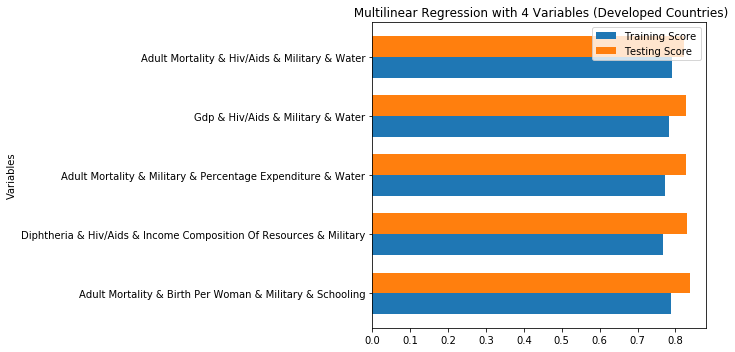

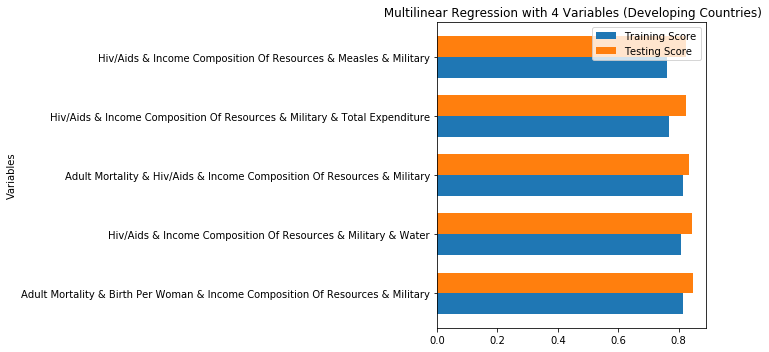

In [35]:
#Graphing 4Variable Regression Results
for label in labels:
    top5 = multilinear4[label][:5]
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Multilinear Regression with 4 Variables ({label.title()} Countries)')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}4.png')

# Developed Vs Developing Countries For Different Factors

In [36]:
labels = ["health","nonhealth"]
datalabels = ["developed", "developing"]
thelabels = ["health_developed","health_developing","nonhealth_developed","nonhealth_developing"]
cols = []
cols.append(['Country', 'Year', 'Life Expectancy', 'Adult Mortality', 'Infant Deaths','Hepatitis B','Measles', 'Bmi', 'Under-Five Deaths', 'Polio','Diphtheria', 'Hiv/Aids', 'Thinness 1-19 Years','Thinness 5-9 Years'])
cols.append(['Country', 'Year', 'Life Expectancy', 'Alcohol', 'Percentage Expenditure', 'Total Expenditure','Gdp', 'Population','Income Composition Of Resources', 'Schooling','Fdi', 'Birth Per Woman', 'Water', 'Military'])
print(cols[1])

['Country', 'Year', 'Life Expectancy', 'Alcohol', 'Percentage Expenditure', 'Total Expenditure', 'Gdp', 'Population', 'Income Composition Of Resources', 'Schooling', 'Fdi', 'Birth Per Woman', 'Water', 'Military']


In [37]:
#Linear regression
for index in range(len(datasets)):
    datalabel = datalabels[index]
    for col in range(len(cols)):
        results ={}
        label = labels[col] + "_" + datalabel
        others = cols[col][3:]
        for value in others:
            fewdata = alldata[["Country","Year","Life Expectancy",value]].copy().dropna(how="any")
            X = fewdata[[value]]
            y = fewdata["Life Expectancy"].values.reshape(-1, 1)

            #Split Data into Train and Test
            X_train, X_test, y_train, y_test = train_test_split(X, y)

            model = LinearRegression()

            model.fit(X_train, y_train)
            training_score = model.score(X_train, y_train)
            testing_score = model.score(X_test, y_test)

            results[value] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0], "y intercept": model.intercept_[0]} 
            scores = pd.DataFrame(results)
            scores=scores.transpose().sort_values(by=['Testing Score'], ascending=False)
            linear1[label] = scores
linear1["health_developed"].head()

,Training Score,Testing Score,Variable,Coefficent,y intercept
Adult Mortality,0.527451,0.551636,Adult Mortality,-0.0520245,78.5944
Hiv/Aids,0.367887,0.417065,Hiv/Aids,-1.02029,71.762
Bmi,0.304485,0.392575,Bmi,0.25531,60.0326
Thinness 5-9 Years,0.221304,0.317908,Thinness 5-9 Years,-0.914632,74.1345
Thinness 1-19 Years,0.245323,0.252578,Thinness 1-19 Years,-0.989374,74.4957


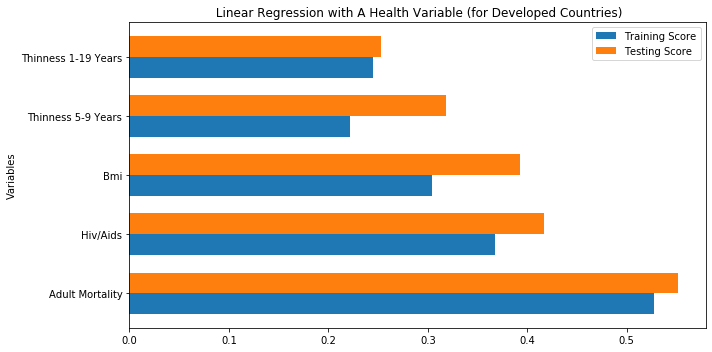

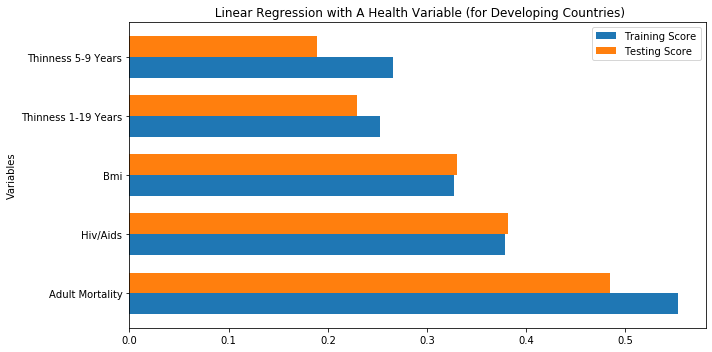

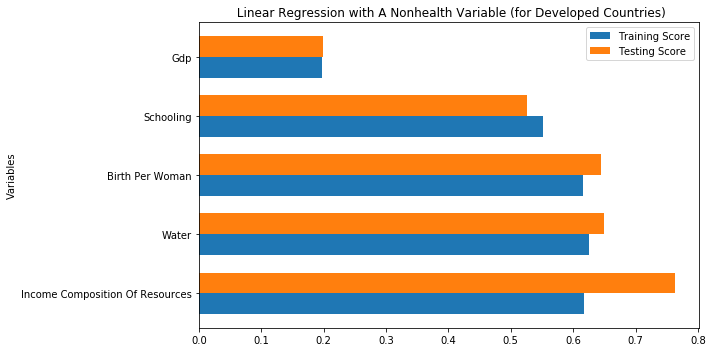

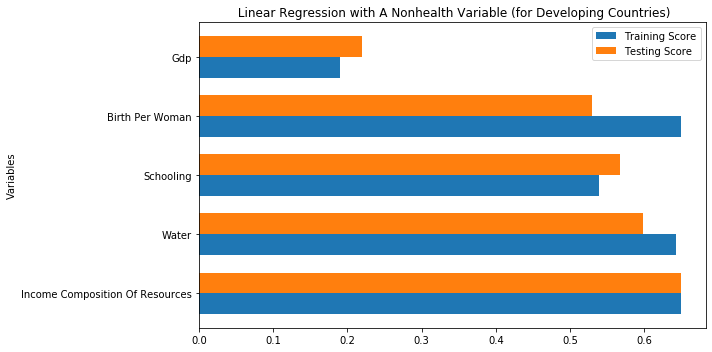

In [38]:
#Graphing Regression Results
for label in thelabels:
    top5 = linear1[label][:5]
    titlepart = label.split("_")
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Linear Regression with A {titlepart[0].title()} Variable (for {titlepart[1].title()} Countries)')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}1.png')

In [39]:
#2 variable regression
for index in range(len(datasets)):
    datalabel = datalabels[index]
    for col in range(len(cols)):
        results ={}
        label = labels[col] + "_" + datalabel
        others = cols[col][3:]
        for o1 in range(len(others)-1):
            value=others[o1]
            otherstoo = others[1:]
            for other in otherstoo:
                fewdata = alldata[["Country","Year","Life Expectancy",value, other]].copy().dropna(how="any")
                if (value != other):
                    theX = [value, other]
                    theX.sort()
                    X = fewdata[theX]
                    y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                    #Split Data into Train and Test
                    X_train, X_test, y_train, y_test = train_test_split(X, y)

                    model = LinearRegression()

                    model.fit(X_train, y_train)
                    training_score = model.score(X_train, y_train)
                    testing_score = model.score(X_test, y_test)

                    resultstoo[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1], "y intercept": model.intercept_[0]} 
        scorestoo = pd.DataFrame(resultstoo)
        scorestoo = scorestoo.transpose().sort_values(by=['Testing Score'], ascending=False)
        multilinear2[label] = scorestoo
multilinear2["health_developed"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,y intercept
Adult Mortality & Schooling,0.740875,0.779642,Adult Mortality,-0.0346849,Schooling,1.70438,54.5101
Adult Mortality & Birth Per Woman,0.765941,0.777699,Adult Mortality,-0.0324128,Birth Per Woman,-3.47629,85.2742
Hiv/Aids & Income Composition Of Resources,0.77428,0.775832,Income Composition Of Resources,-0.670238,Hiv/Aids,36.0964,47.3269
Adult Mortality & Income Composition Of Resources,0.793746,0.770487,Adult Mortality,-0.0291086,Income Composition Of Resources,34.251,52.1585
Hiv/Aids & Water,0.75964,0.761047,Water,-0.655012,Hiv/Aids,0.32614,43.6917


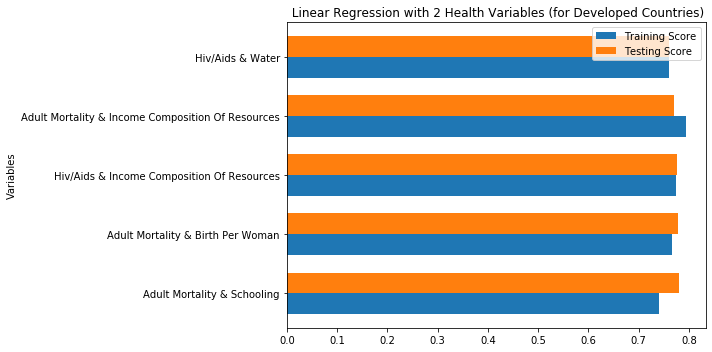

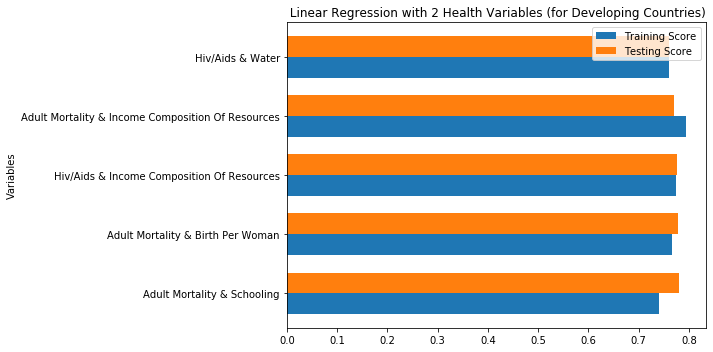

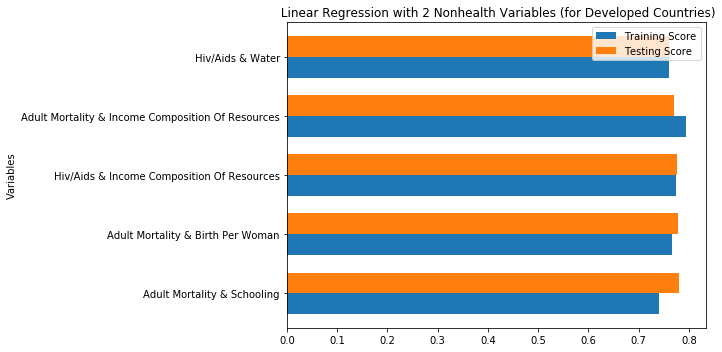

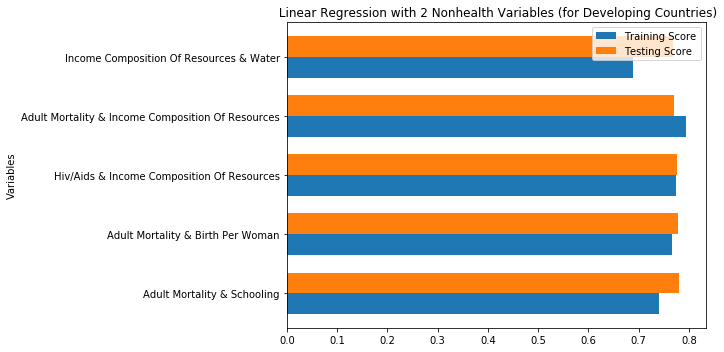

In [40]:
#Graphing 2 Variable Regression Results
for label in thelabels:
    top5 = multilinear2[label][:5]
    titlepart = label.split("_")
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Linear Regression with 2 {titlepart[0].title()} Variables (for {titlepart[1].title()} Countries)')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}2.png')

In [41]:
#3 variable regression
for index in range(len(datasets)):
    datalabel = datalabels[index]
    for col in range(len(cols)):
        results ={}
        label = labels[col] + "_" + datalabel
        others = cols[col][3:]
        for o1 in range(len(others)-2):
            value=others[o1]
            otherstoo = others[1:]
            for o2 in range(len(otherstoo)-1):
                other=otherstoo[o2+1]
                othersthree = otherstoo[1:]
                for other2 in othersthree:
                    fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2]].copy().dropna(how="any")
                    if (value != other) and (value != other2) and (other2 != other):
                        theX = [value, other,other2]
                        theX.sort()
                        X = fewdata[theX]
                        y = fewdata["Life Expectancy"].values.reshape(-1,1)

                        #Split Data into Train and Test
                        X_train, X_test, y_train, y_test = train_test_split(X, y)

                        model = LinearRegression()

                        model.fit(X_train, y_train)
                        training_score = model.score(X_train, y_train)
                        testing_score = model.score(X_test, y_test)

                        resultsthree[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2], "y intercept": model.intercept_[0]} 
        scoresthree = pd.DataFrame(resultsthree)
        scoresthree=scoresthree.transpose().sort_values(by=['Testing Score'], ascending=False)
        multilinear3[label]=scoresthree
multilinear3["health_developed"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,y intercept
Adult Mortality & Income Composition Of Resources & Water,0.805575,0.844038,Adult Mortality,-0.0264019,Water,19.5485,Income Composition Of Resources,0.160903,47.8782
Birth Per Woman & Hiv/Aids & Schooling,0.806551,0.839482,Birth Per Woman,-2.45902,Schooling,-0.681691,Hiv/Aids,1.087,64.6631
Adult Mortality & Alcohol & Income Composition Of Resources,0.771806,0.835765,Adult Mortality,-0.0319095,Income Composition Of Resources,0.0354414,Alcohol,30.4824,54.9702
Hiv/Aids & Income Composition Of Resources & Military,0.759783,0.831976,Income Composition Of Resources,-0.644971,Military,36.6066,Hiv/Aids,0.309426,46.5563
Hiv/Aids & Schooling & Water,0.809475,0.830504,Schooling,-0.671576,Water,1.12174,Hiv/Aids,0.189719,41.2638


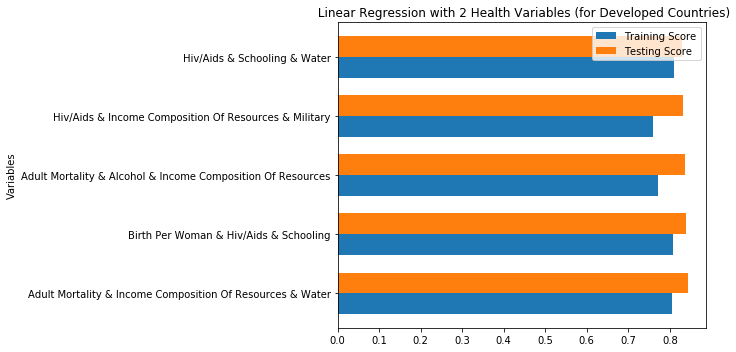

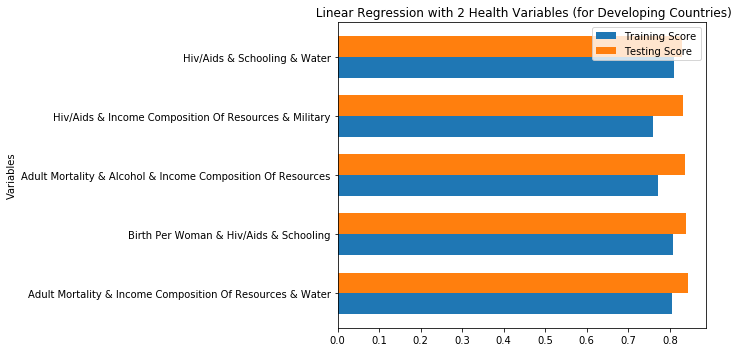

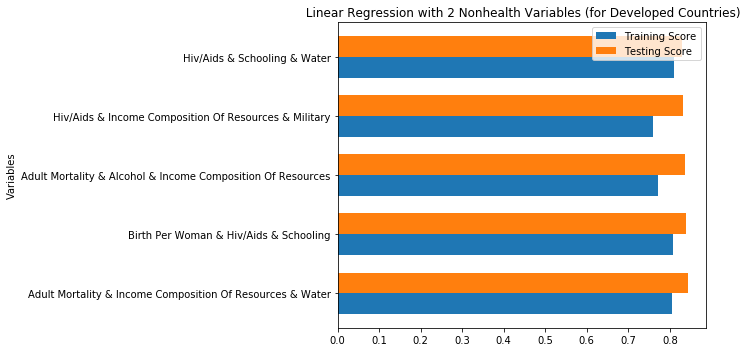

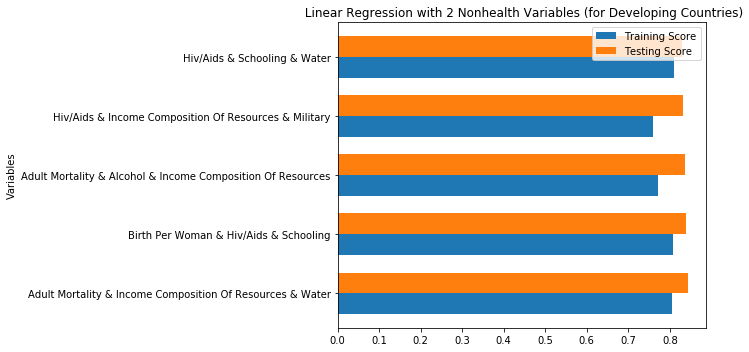

In [42]:
#Graphing 3 Variable Regression Results
for label in thelabels:
    top5 = multilinear3[label][:5]
    titlepart = label.split("_")
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Linear Regression with 2 {titlepart[0].title()} Variables (for {titlepart[1].title()} Countries)')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}3.png')

In [43]:
#4 variable regression
for index in range(len(datasets)):
    datalabel = datalabels[index]
    for col in range(len(cols)):
        results ={}
        label = labels[col] + "_" + datalabel
        others = cols[col][3:]
        for o1 in range(len(others)-3):
            value=others[o1]
            otherstoo = others[1:]
            for o2 in range(len(otherstoo)-2):
                other=otherstoo[o2+1]
                othersthree = otherstoo[1:]
                for o3 in range(len(othersthree)-1):
                    other=otherstoo[o3+2]
                    othersfour = othersthree[1:]
                    for other3 in othersfour:
                        fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2,other3]].copy().dropna(how="any")
                        if (value != other) and (value != other2) and (other2 != other) and (value != other3) and (other3 != other2) and (other3 != other):
                            theX = [value, other,other2,other3]
                            theX.sort()
                            X = fewdata[theX]
                            y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                            #Split Data into Train and Test
                            X_train, X_test, y_train, y_test = train_test_split(X, y)

                            model = LinearRegression()

                            model.fit(X_train, y_train)
                            training_score = model.score(X_train, y_train)
                            testing_score = model.score(X_test, y_test)

                            resultsfour[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score, "Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2],"Other Variable3":other3,f"Coefficent4": model.coef_[0][3], "y intercept": model.intercept_[0]} 
        scoresfour = pd.DataFrame(resultsfour)
        scoresfour =scoresfour.transpose().sort_values(by=['Testing Score'], ascending=False)
        multilinear4[label] = scoresfour
multilinear4["health_developed"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,Other Variable3,Coefficent4,y intercept
Adult Mortality & Birth Per Woman & Income Composition Of Resources & Military,0.814967,0.847334,Adult Mortality,-0.0263445,Birth Per Woman,-1.78798,Military,21.9897,Income Composition Of Resources,0.0716099,64.7366
Hiv/Aids & Income Composition Of Resources & Military & Water,0.808749,0.843235,Income Composition Of Resources,-0.639638,Water,20.8239,Military,0.233969,Hiv/Aids,0.181864,41.6979
Adult Mortality & Hiv/Aids & Income Composition Of Resources & Military,0.814224,0.834762,Adult Mortality,-0.020407,Income Composition Of Resources,-0.400955,Military,31.9695,Hiv/Aids,0.261175,52.531
Hiv/Aids & Income Composition Of Resources & Military & Total Expenditure,0.77008,0.826388,Income Composition Of Resources,-0.699995,Hiv/Aids,34.7783,Military,0.33009,Total Expenditure,0.392984,45.4164
Hiv/Aids & Income Composition Of Resources & Measles & Military,0.763316,0.8232,Income Composition Of Resources,-0.641801,Hiv/Aids,36.7174,Military,-1.16591e-05,Measles,0.247283,46.5909


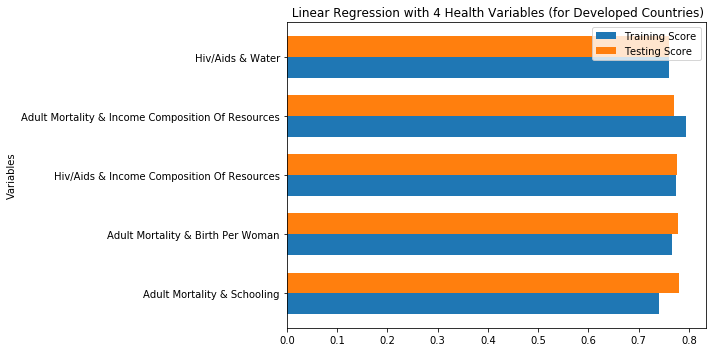

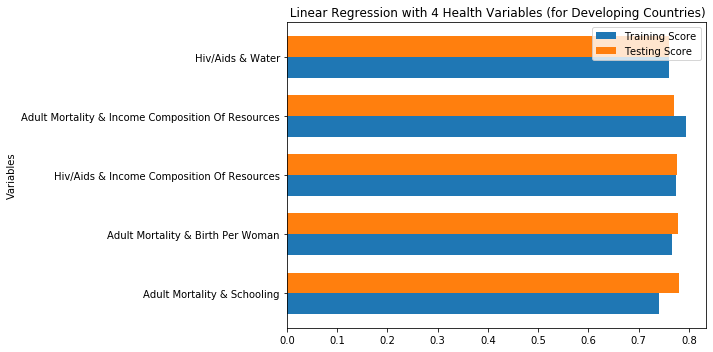

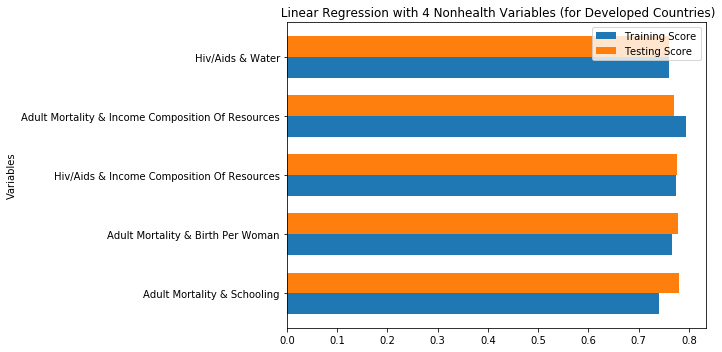

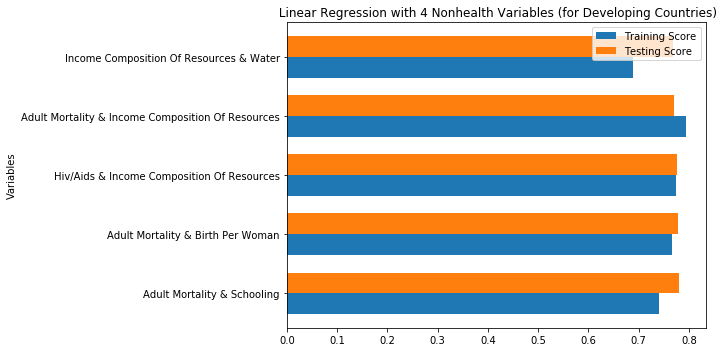

In [44]:
#Graphing 4 Variable Regression Results
for label in thelabels:
    top5 = multilinear2[label][:5]
    titlepart = label.split("_")
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Linear Regression with 4 {titlepart[0].title()} Variables (for {titlepart[1].title()} Countries)')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}4.png')

# All the Regression Datasets

In [45]:
#Grouping all to one list
allregressions= []
allregressions.append(linear1)
allregressions.append(multilinear2)
allregressions.append(multilinear3)
allregressions.append(multilinear4)

In [46]:
datalab = ["linear1","multilinear2","multilinear3","multilinear4"]
for x in range(len(allregressions)):
    for y in list(allregressions[x].keys()):
        allregressions[x][y].to_csv(f'regressions/{datalab[x]}_{y}.csv')    

In [ ]:
#find each regression
x = input("How Many Variables to Regress? Choose from 1 to 4" )
choices = {}
counter = 0
for string in list(allregressions[1+int(x)].keys()):
    choices[counter] = string
    counter += 1 
y = input("Which Dataset Do You Select? ")
allregressions[1+int(x)][choices[y]].head